In [3]:
#%% Imports
import csv
from matplotlib import pyplot as plt
import numpy as np

In [4]:

#%% Read data
data = []
with open('calibration.csv') as csvfile:
	reader = csv.reader(csvfile)
	for row in reader:
		for col in row:
			
			data.append(int(col))


print(data)

[7903, 8003, 8102, 8186, 8272, 8346, 8430, 8524, 8608, 8682, 8766, 8858, 8945, 9018, 9098, 9193, 9279, 9350, 9430, 9525, 9607, 9681, 9762, 9851, 9938, 10010, 10092, 10179, 10266, 10338, 10416, 10507, 10587, 10661, 10742, 10831, 10914, 10988, 11069, 11154, 11238, 11314, 11392, 11477, 11560, 11634, 11714, 11801, 11883, 11959, 12040, 12128, 12207, 12282, 12363, 12449, 12532, 12606, 12688, 12776, 12856, 12926, 13015, 13105, 13179, 13253, 13341, 13429, 13508, 13581, 13667, 13751, 13832, 13906, 13992, 14081, 14161, 14232, 14318, 14407, 14487, 14560, 14644, 14732, 14815, 14884, 14970, 15061, 15144, 15213, 15296, 15388, 15470, 15538, 15626, 15719, 15799, 15868, 15953, 16044, 16126, 16198, 16281, 8180, 72, 142, 226, 316, 398, 470, 553, 641, 726, 798, 875, 967, 1051, 1121, 1200, 1291, 1373, 1445, 1524, 1613, 1694, 1766, 1843, 1933, 2014, 2084, 2165, 2250, 2333, 2403, 2483, 2573, 2652, 2725, 2805, 2888, 2973, 3044, 3123, 3210, 3293, 3368, 3445, 3533, 3616, 3686, 3770, 3858, 3940, 4012, 4094, 4185

In [5]:
# %% Sort data
data.sort()
print(data)
data = np.array(data)

[72, 142, 226, 316, 398, 470, 553, 641, 726, 798, 875, 967, 1051, 1121, 1200, 1291, 1373, 1445, 1524, 1613, 1694, 1766, 1843, 1933, 2014, 2084, 2165, 2250, 2333, 2403, 2483, 2573, 2652, 2725, 2805, 2888, 2973, 3044, 3123, 3210, 3293, 3368, 3445, 3533, 3616, 3686, 3770, 3858, 3940, 4012, 4094, 4185, 4264, 4337, 4420, 4513, 4593, 4663, 4751, 4841, 4919, 4992, 5084, 5172, 5250, 5325, 5412, 5505, 5586, 5658, 5746, 5837, 5919, 5992, 6079, 6172, 6253, 6327, 6412, 6507, 6590, 6663, 6748, 6842, 6926, 6998, 7087, 7179, 7263, 7334, 7422, 7524, 7606, 7668, 7772, 7863, 7903, 8003, 8102, 8180, 8186, 8272, 8346, 8430, 8524, 8608, 8682, 8766, 8858, 8945, 9018, 9098, 9193, 9279, 9350, 9430, 9525, 9607, 9681, 9762, 9851, 9938, 10010, 10092, 10179, 10266, 10338, 10416, 10507, 10587, 10661, 10742, 10831, 10914, 10988, 11069, 11154, 11238, 11314, 11392, 11477, 11560, 11634, 11714, 11801, 11883, 11959, 12040, 12128, 12207, 12282, 12363, 12449, 12532, 12606, 12688, 12776, 12856, 12926, 13015, 13105, 13179, 

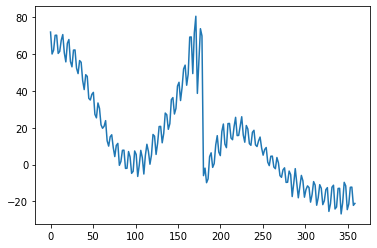

In [6]:
# %%
angles = np.arange(0, 360, 1.8)
ideal_encoder_values = angles / 360 * (1 << 14)

plt.plot(angles, data - ideal_encoder_values)
# %%